# Análisis exploratorio de Canadian Collision Statistics

## Importación y transformación de datos

#### Se importan las diferentes librerias que vamos a utilizar en el EDA

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as ts

import warnings

import scipy.stats as ss

#### Se importa el dataset

In [56]:
directory = 'NCDB_1999_to_2014.csv'

coches = pd.read_csv(directory, sep=',')
coches # Visualizamos el dataset para comprobar que se ha cargado correctamente.

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


In [57]:
# Comprobamos el número de filas y columnas del dataset.
print("Dimensiones del dataset: ", coches.shape[0], " filas (registros de accidente) y ", coches.shape[1], " columnas (variables).")

Dimensiones del dataset:  5860405  filas (registros de accidente) y  22  columnas (variables).


#### Diccionario de datos:

**COLLISION VARIABLES**
- C_YEAR :   (tipo: int64) Año de la colision
- C_MNTH :   (tipo: object) Mes de la colision
- C_WDAY :   (tipo: object) Dia de la semana de la colision
- C_HOUR :   (tipo: object) Hora de la colision
- C_SEV :    (tipo: int64) Severidad de la colision
- C_VEHS :   (tipo: object) Numero de vehiculos involucrados en la colision
- C_CONF :   (tipo: object) Tipo de colision
- C_RCFG :   (tipo: object) Donde se produjo la colision
- C_WTHR :   (tipo: object) Condicion climatica en el momento de la colision
- C_RSUR :   (tipo: object) Condicion de la superficie en el momento de la colision
- C_RALN :   (tipo: object) Condicion de la avenida en el momento de la colision
- C_TRAF :   (tipo: object) Condicion del tráfico en el momento de la colision

**VEHICLE VARIABLES** 
- V_ID :     (tipo: object) Identificador del vehiculo
- V_TYPE :   (tipo: object) Tipo de vehiculo
- V_YEAR :   (tipo: object) Año del vehiculo

**PEOPLE VARIABLES**
- P_ID :     (tipo: object) Identificador de la persona
- P_SEX :    (tipo: object) Sexo de la persona
- P_AGE :    (tipo: object) Edad de la persona
- P_PSN :    (tipo: object) Donde estaban situadas las personas 
- P_ISEV :   (tipo: object) Tratamiento medico requerido
- P_SAFE :   (tipo: object) Dispositivo de seguridad utilizado
- P_USER :   (tipo: object) Tipo de usuario en carretera

### Data cleaning

#### Duplicados

In [58]:
df_complete = coches[:]

In [59]:
df_complete.duplicated().sum() # Comprobamos si hay registros duplicados.

5069

Observamos que tenemos 5069 registros de accidentes duplicados, por lo que vamos a eliminarlos.

In [60]:
df_complete.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


#### Missing values

Vamos a convertir todos los datos Unknown en nan. Luego reemplazaremos estos valores nan por la moda o mediana de cada variable para poder trabajar con ellos y alterar lo menos posible la calidad del dataset.

In [61]:
for columna in df_complete:
    df_complete[columna] = df_complete[columna].replace(["U", "X", "Q", "N", "UU", "XX", "QQ", "NN", "UUU", "UUUU", "QQQQ", "NNNN"], np.nan)

In [62]:
df_complete.isnull().sum() # Comprobamos los valores nulos por variable.

C_YEAR          0
C_MNTH        385
C_WDAY       1323
C_HOUR      59409
C_SEV           0
C_VEHS        544
C_CONF     463999
C_RCFG     648946
C_WTHR     102988
C_RSUR     248668
C_RALN     463312
C_TRAF     305501
V_ID          433
V_TYPE     283111
V_YEAR     584378
P_ID        10992
P_SEX      249740
P_AGE      395156
P_PSN       97677
P_ISEV     371412
P_SAFE    1234284
P_USER     175586
dtype: int64

Tenemos muchos registros con valores nan por lo que, vamos a hacer una comprobación antes de convertirlos analizando el numero de registros por cada valor de una de las columnas mas afectadas, asi verificaremos que su registro mas frecuente no se ve afectado de forma desmesurada.

In [63]:
df_complete['C_RCFG'].value_counts() 

02    2746752
01    2079515
03     289184
05      51196
04      23723
08      11780
06       6001
09       1743
07       1009
10        556
Name: C_RCFG, dtype: int64

In [64]:
# Hacemos la conversion
for column in df_complete:
    if df_complete[column].isnull().any():
        if(column in df_complete):
            df_complete[column]=df_complete[column].fillna(df_complete[column].mode()[0])
        else:
            df_complete[column]=df_complete[column].fillna(df_complete[column].median)

In [65]:
df_complete['C_RCFG'].value_counts()

02    3395698
01    2079515
03     289184
05      51196
04      23723
08      11780
06       6001
09       1743
07       1009
10        556
Name: C_RCFG, dtype: int64

La variable tratada es C_RCFG, y su registro mas repetido aumentaría un 11% de su valor original. El resto de variables unicamente verían aumentado su valor mas repetido 5%-8%.

In [66]:
df_complete.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

La mayor parte de las variables son categóricas y de tipo object. Las unicas columnas que son numéricas son C_YEAR, el año en que se produjo la colision y C_SEV, nuestra variable objetivo.

### Tratamiento individual de cada variable para estandarizar los datos

Vamos a comprobar todos los valores de las columnas para comprobar que los datos vienen en el mismo formato.

#### C_MNTH

In [67]:
# Tranformamos Month a tipo numerico.

df_complete['C_MNTH'] = ((df_complete['C_MNTH']).astype(str).str.zfill(2)).astype('int64')
df_complete['C_MNTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

#### C_WDAY

In [68]:
# Transformamos Wday a tipo numerico.

df_complete['C_WDAY'] = ((df_complete['C_WDAY']).astype(str).str.zfill(2)).astype('int64')
df_complete['C_WDAY'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

#### C_HOUR

In [69]:
# Transformamos Hour a tipo numerico.

df_complete['C_HOUR'] = ((df_complete['C_HOUR']).astype(str).str.zfill(2)).astype('int64')
df_complete['C_HOUR'].unique()

array([20,  8, 17, 15, 14,  1, 11, 13, 19, 16,  9,  2, 18, 12, 10, 23,  0,
        6,  7, 21,  5, 22,  3,  4], dtype=int64)

#### C_VEHS

In [70]:
df_complete['C_VEHS'] = df_complete['C_VEHS'].astype(str).str.zfill(2)

vehs_clean = {"C_VEHS": {"1.0":'01', "2.0": '02', "3.0":'03', "4.0":'04', "5.0":'05', "6.0":'06', "7.0":'07', "8.0":'08', "9.0":'09', "10.0":'10'}}
df_complete.replace(vehs_clean, inplace=True)

df_complete['C_VEHS'].unique()

array(['02', '01', '03', '04', '06', '07', '09', '05', '13', '08', '12',
       '14', '10', '11', '16', '26', '71', '19', '25', '21', '27', '15',
       '35', '22', '41', '46', '31', '18', '56', '23', '36', '17', '20',
       '29', '77', '28', '38', '32', '33', '54', '72', '40', '44', '58',
       '30', '24', '34', '39', '51', '57', '43', '37'], dtype=object)

#### V_ID

In [71]:
df_complete['V_ID'] = df_complete['V_ID'].astype(str).str.zfill(2)
df_complete['V_ID'].unique()

array(['01', '02', '99', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '83', '85',
       '86', '75', '76', '77'], dtype=object)

#### P_SEX

Fijandonos en el contenido de las columnas, vemos que P_SEX esta compuesta por strings 'M':Male y 'F':Female. Convertir sus valores en 0 y 1 respectivamente para trabajar con ellos.

In [72]:
psex_clean = {"P_SEX":{"M":'0', "F":'1'}}
df_complete.replace(psex_clean, inplace=True)

df_complete.P_SEX.value_counts()

0    3419984
1    2440421
Name: P_SEX, dtype: int64

Ya tenemos todos los datos del dataset limpios y listo para poder manipularlos.

### Ordenamos el dataset

Ahora creamos una columna 'Date' que la asignaremos al indice, para tener el dataframe ordenado por fecha.

In [73]:
df_complete['Date'] = df_complete['C_YEAR'].astype(str) + df_complete['C_MNTH'].astype(str).str.zfill(2)+ df_complete['C_WDAY'].astype(str).str.zfill(2) 
df_complete['Date'] = pd.to_datetime(df_complete['Date'], format='%Y-%m-%d')

df_complete = df_complete.set_index(['Date']).sort_index()
df_complete = df_complete.sort_values(by=['Date', 'C_HOUR'], ascending=True)

df_complete

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-01,1999,1,1,0,2,02,21,02,1,5,...,01,06,1989,01,0,18,11,2,02,1
1999-01-01,1999,1,1,0,2,02,21,02,1,5,...,01,06,1989,02,0,16,13,2,02,2
1999-01-01,1999,1,1,0,2,02,21,02,1,5,...,02,01,1991,01,1,16,11,1,02,1
1999-01-01,1999,1,1,0,2,02,34,02,4,3,...,02,01,1992,01,0,18,11,1,02,1
1999-01-01,1999,1,1,0,2,02,34,02,4,3,...,01,01,1998,01,0,30,11,2,02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-07,2014,12,7,23,2,01,21,02,5,5,...,01,01,2000,01,1,17,11,2,02,1
2014-12-07,2014,12,7,23,2,01,06,01,4,3,...,01,01,2013,01,1,13,11,1,02,1
2014-12-07,2014,12,7,23,2,01,06,01,4,3,...,99,01,2000,01,1,19,99,2,02,3


Creamos un dataframe paralelo al mismo para utilizarlo a posteriori en los modelos antes de manipularlos para su análisis exploratorio.

In [74]:
df_core = df_complete.copy()

## Análisis exploratorio

Analizamos la variable objetivo C_SEV, severidad de la colision, compuesta por valores los valores:
- 1: Accidente mortal
- 2: Accidente no mortal 

In [75]:
df_complete_sev_status = df_complete['C_SEV'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_complete_sev_conteo = df_complete['C_SEV'].value_counts().rename('count').reset_index()
df_complete_sev_pc = df_complete_sev_status.merge(df_complete_sev_conteo, on='index')

df_complete_sev_pc

,index,percent,count
0,2,98.316959,5761772
1,1,1.683041,98633


La mayor parte de las colisiones son Non-fatal injury, 98'31%. Esta variable no tenia datos Unknown por lo que no se ha visto afectada por el tratamiento anterior.

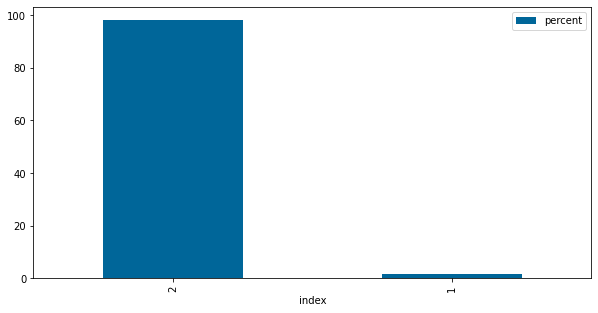

In [76]:
hist = df_complete_sev_pc.plot.bar(x='index', y='percent', color='#006699', figsize=(10,5))

# Poner dimensiones al grafico, o usar otro tipo de grafico

Creamos dos columnas 'fatal' y 'non-fatal', para poder hacer calculos con ellas

In [77]:
df_complete['fatal'] = (df_complete['C_SEV'] == 1).astype(np.int64)
df_complete['non_fatal'] = (df_complete['C_SEV'] == 2).astype(np.int64)


df_fatality = df_complete.groupby('Date')['fatal', 'non_fatal'].sum()
df_fatality

,fatal,non_fatal
Date,,
1999-01-01,77,4562
1999-01-02,34,4102
1999-01-03,63,4500
1999-01-04,52,4669
1999-01-05,82,6171
...,...,...
2014-12-03,62,4389
2014-12-04,38,3279
2014-12-05,69,3730


In [78]:
df_complete.describe(include=['O'])

,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
count,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405
unique,52,18,10,7,9,6,17,81,17,114,96,2,99,13,3,7,5
top,02,21,02,1,1,1,18,01,01,2000,01,0,18,11,2,02,1
freq,3612984,2235211,3395698,4177526,4094830,4625671,3373549,3109716,5110501,907561,4181900,3419984,566875,4023763,3444843,5398187,3834413


# Graficos individuales

Graficamos todas las variables para ver como se distribuyen.

In [79]:
def plot_feature(df, col_name, isContinuous, target):
    """
    Visualize a variable with and without faceting on the loan status.
    - df dataframe
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    count_null = df[col_name].isnull().sum()
    if isContinuous:
        
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name+ ' Numero de nulos: '+str(count_null))
    plt.xticks(rotation = 90)


    if isContinuous:
        sns.boxplot(x=col_name, y=target, data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by '+target)
    else:
        data = df.groupby(col_name)[target].value_counts(normalize=True).to_frame('proportion').reset_index() 
        data.columns = [i, target, 'proportion']
        #sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        sns.barplot(x = col_name, y = 'proportion', hue= target, data = data, saturation=1, ax=ax2)
        ax2.set_ylabel(target+' fraction')
        ax2.set_title(target)
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

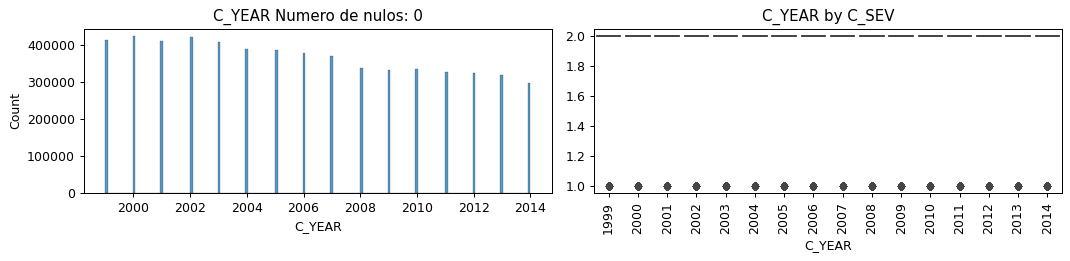

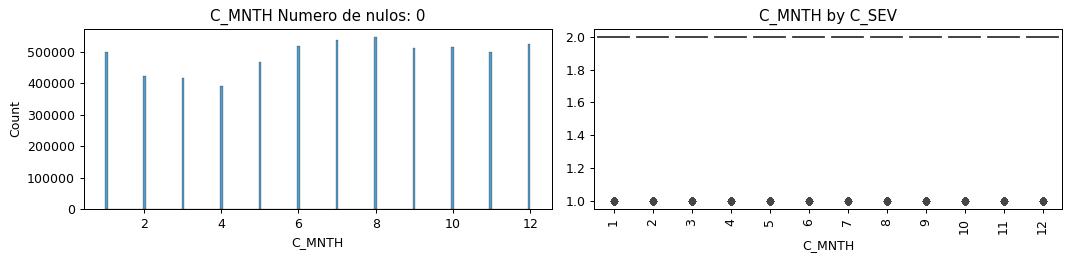

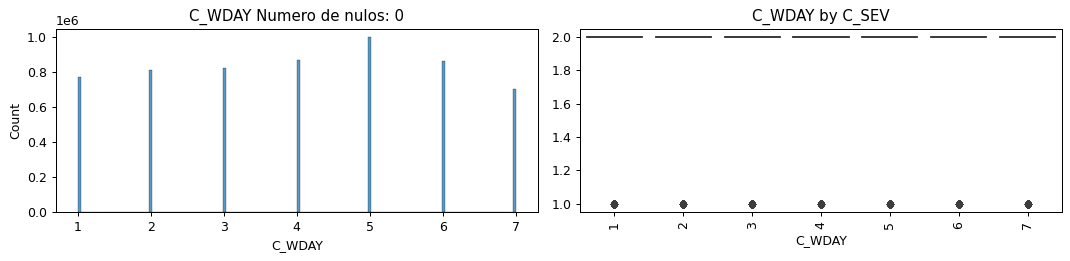

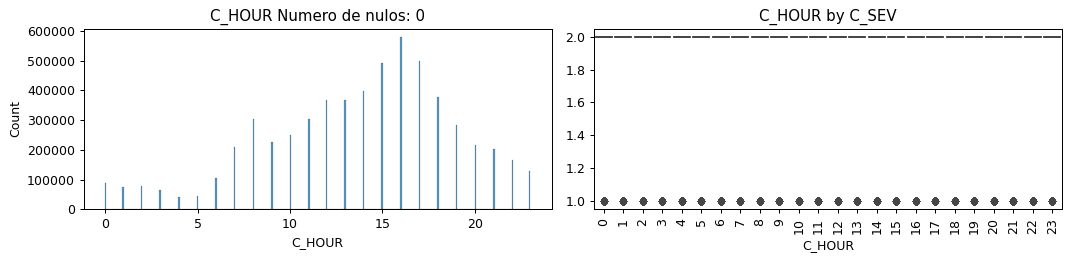

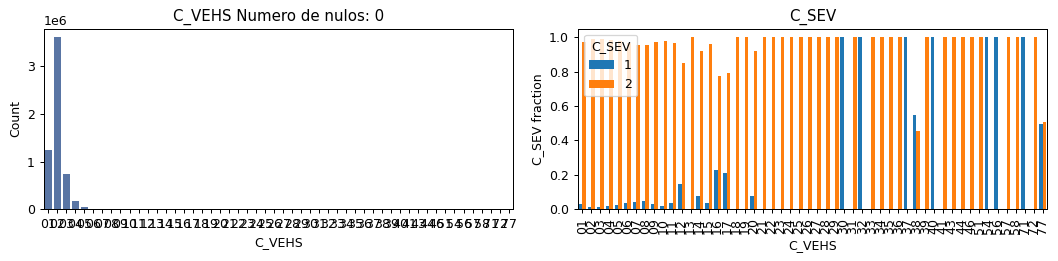

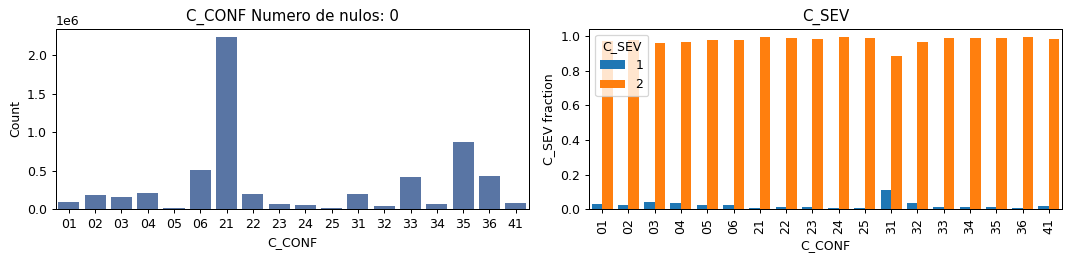

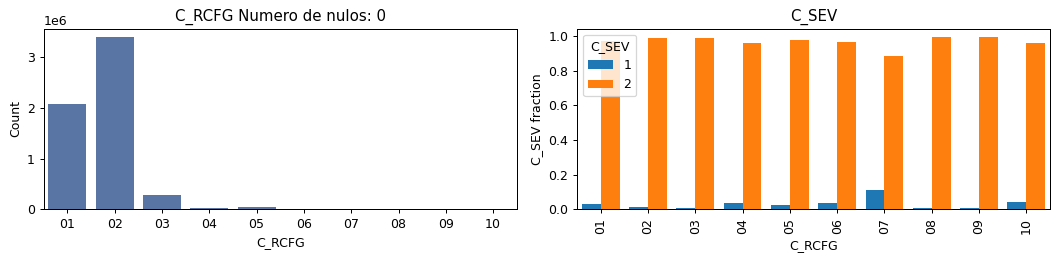

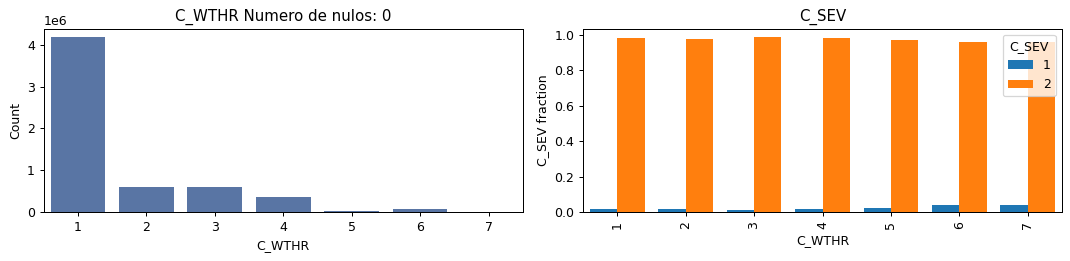

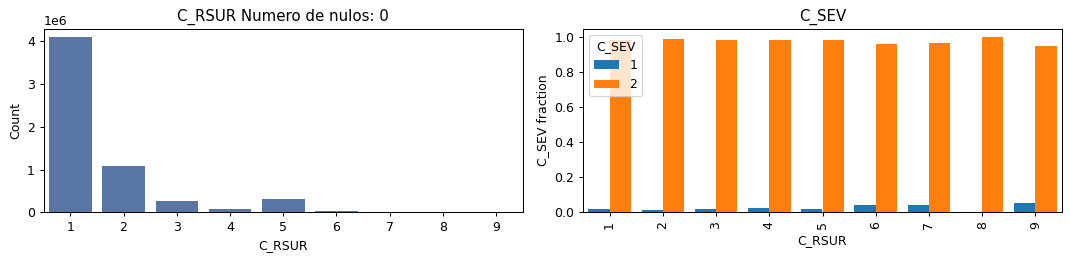

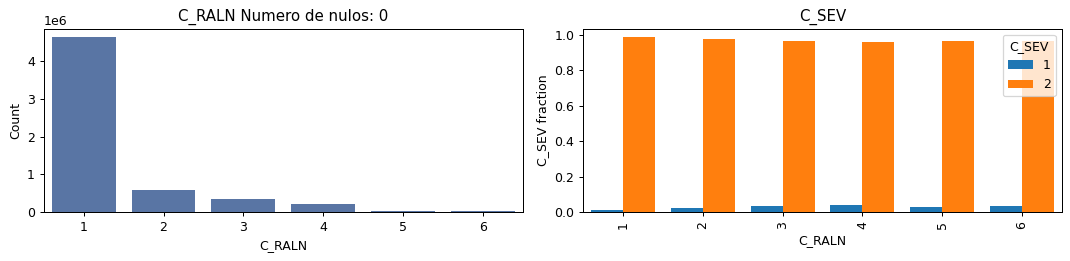

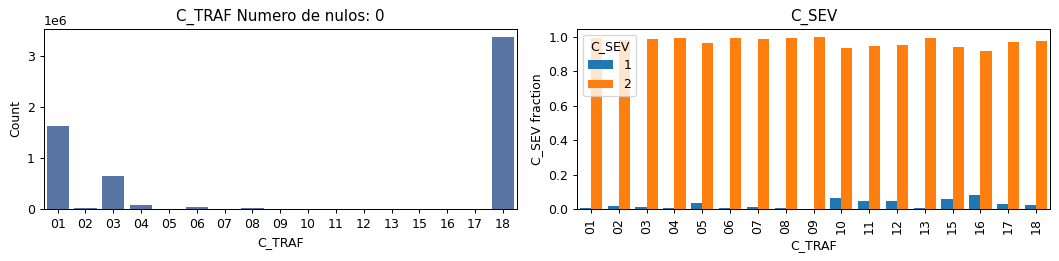

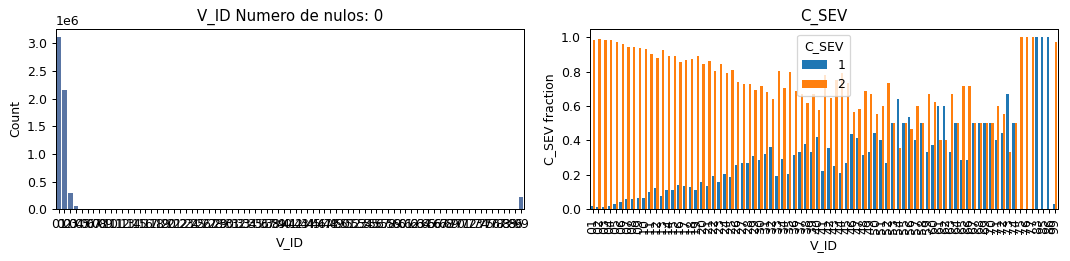

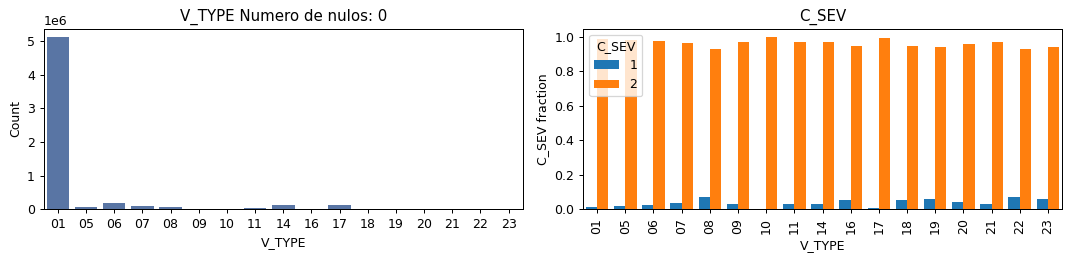

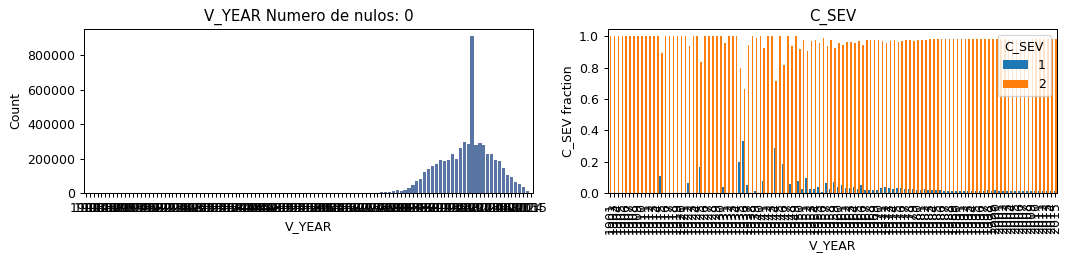

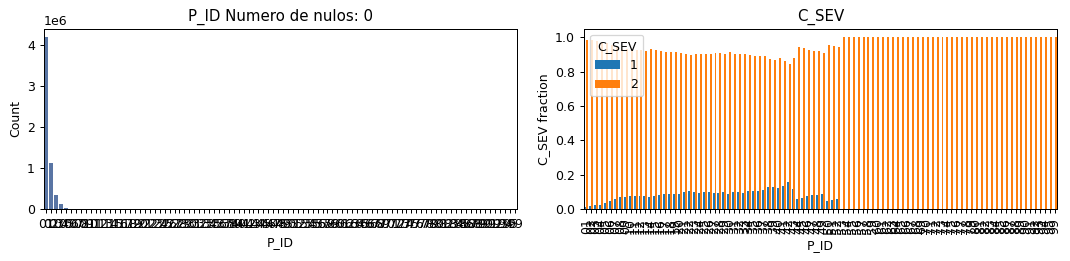

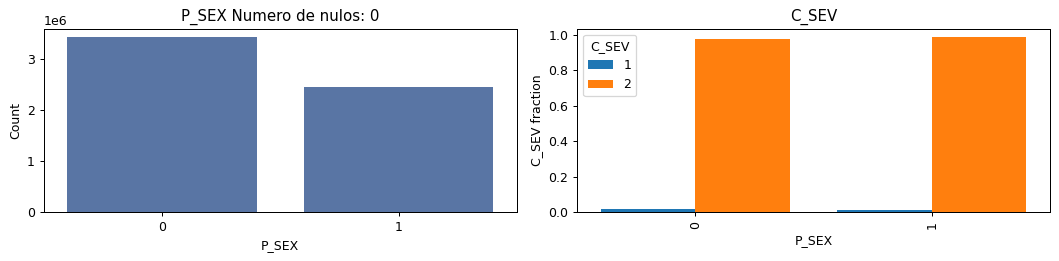

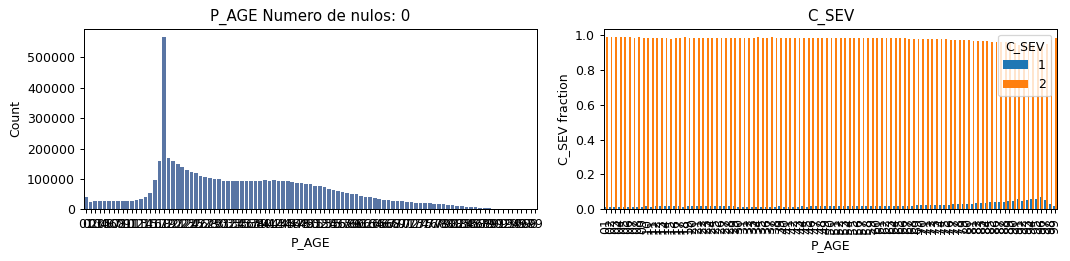

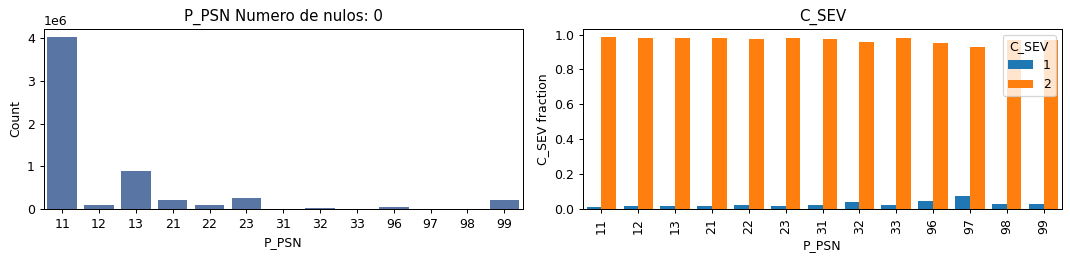

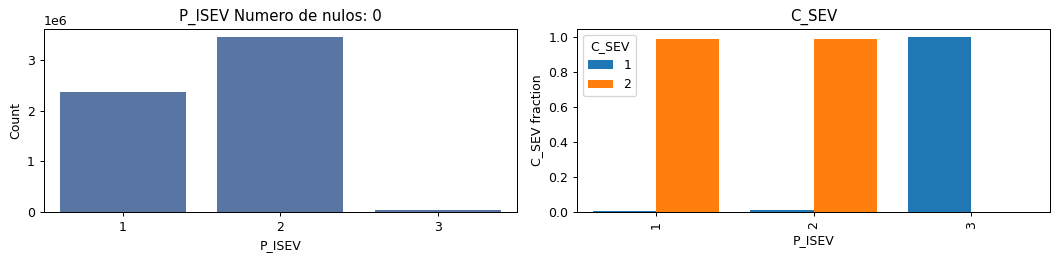

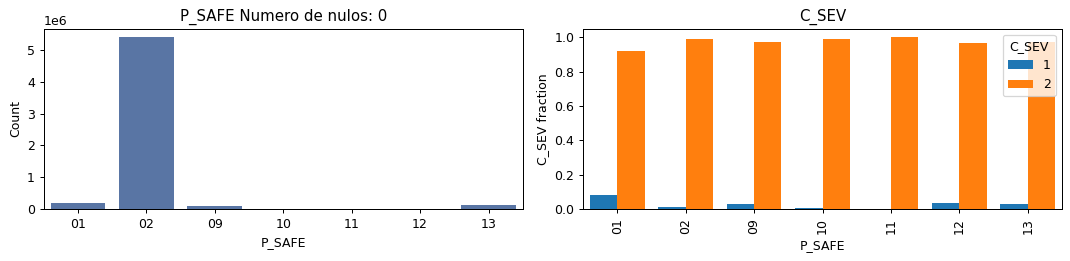

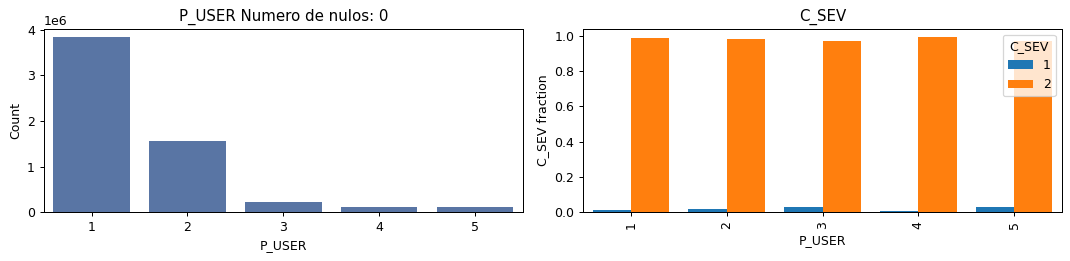

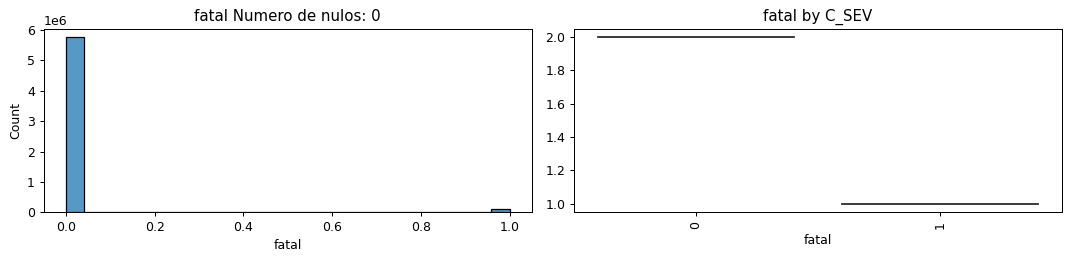

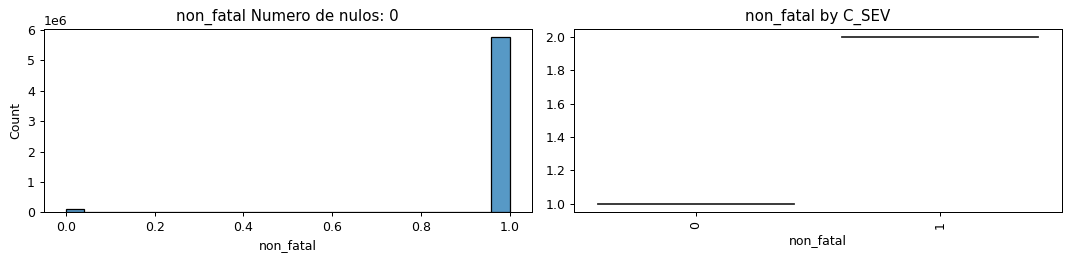

In [80]:
warnings.filterwarnings('ignore')
for i in list(df_complete.columns):
    if (df_complete[i].dtype==np.int64) & (i!='C_SEV'):
        plot_feature(df_complete, col_name=i, isContinuous=True, target='C_SEV')
    elif  i!='C_SEV':
        plot_feature(df_complete, col_name=i, isContinuous=False, target='C_SEV')

## Tratamiento de variables categóricas

Como todas las variables son categoricas excepto las columnas 'Date', trataremos su relacion con la variable objetivo.

In [81]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

### V de Cramér 
Es una medida del tamaño del efecto para la prueba chi-cuadrado de la independencia. En él se mide la forma en que están asociados dos campos categóricos.

- Vcramer <= 0.2 ; Resultado debil. Estadisticamente significativo, debilmente asociados.
- 0.2 < Vcramer <= 0.6 ; Resultado moderado. Los campos estan asociados moderadamente.
- 0.6 < Vcramer <= 1.0 ; Resultado fuerte. Los campos estan fuertemente asociados.

In [82]:
confusion_matrix = pd.crosstab(df_complete["C_SEV"], df_complete["C_VEHS"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

C_VEHS       01       02      03      04     05     06    07    08    09  \
C_SEV                                                                      
1         35724    47072    9907    3077    993    527   253   127    57   
2       1212719  3565912  729563  179959  43084  13862  5428  2543  1776   

C_VEHS    10  ...   44  46  51  54  56  57  58  71   72   77  
C_SEV         ...                                             
1         24  ...    0   0   0  86  58   0   0  92    0  113  
2       1169  ...  102  59  80   0   0  58  61   0  123  116  

[2 rows x 52 columns]


0.08765949619532465

In [83]:
confusion_matrix = pd.crosstab(df_complete["C_SEV"], df_complete["C_CONF"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

C_CONF     01      02      03      04     05      06       21      22     23  \
C_SEV                                                                          
1        2917    4605    6563    7430    325   13104    14342    2636   1017   
2       89513  182330  158847  206920  12724  502364  2220869  194370  69071   

C_CONF     24     25      31     32      33     34      35      36     41  
C_SEV                                                                      
1         437    106   22229   1761    4276    745   11980    2686   1474  
2       51630  10816  173055  45546  417965  61436  856217  428612  79487  


0.1575825578923634

In [84]:
confusion_matrix = pd.crosstab(df_complete["C_SEV"], df_complete["C_RCFG"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

C_RCFG       01       02      03     04     05    06   07     08    09   10
C_SEV                                                                      
1         57730    35720    2654    920   1162   217  115     81    11   23
2       2021785  3359978  286530  22803  50034  5784  894  11699  1732  533


0.06636997267777571

In [85]:
confusion_matrix = pd.crosstab(df_complete["C_SEV"], df_complete["C_WTHR"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

C_WTHR        1       2       3       4      5      6      7
C_SEV                                                       
1         66107   12520    8262    6907    810   3447    580
2       4111419  587706  591843  347708  29520  78992  14584


0.029317350417741625

In [86]:
confusion_matrix = pd.crosstab(df_complete["C_SEV"], df_complete["C_RSUR"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

C_RSUR        1        2       3      4       5      6     7     8    9
C_SEV                                                                  
1         69205    15638    4882   1553    6004   1100   232     4   15
2       4025625  1065326  254352  70488  314441  24255  5786  1222  277


0.017888362138297826

In [87]:
confusion_matrix = pd.crosstab(df_complete["C_SEV"], df_complete["C_RALN"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

C_RALN        1       2       3       4      5      6
C_SEV                                                
1         61554   12401   13407    9043   1218   1010
2       4564117  571624  347463  215179  36773  26616


0.061020897063728215

In [88]:
confusion_matrix = pd.crosstab(df_complete["C_SEV"], df_complete["C_TRAF"])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

C_TRAF       01     02      03     04    05     06    07     08   09    10  \
C_SEV                                                                        
1          8519    397    8770    539   158    362    35    236    1   183   
2       1619790  18717  641238  89149  4041  45238  2384  24243  549  2741   

C_TRAF    11    12    13    15   16    17       18  
C_SEV                                               
1        173   148    32   238   67   119    78656  
2       3248  3061  4266  3614  750  3850  3294893  


0.06507230490501473

Todas las variables categoricas tienen una relacion debil con la variable objetivo. Suponemos que la relacion es debil debido a que tenemos un 98% de registros con accidentes no fatales.

### Análisis individual de cada variable

Empezamos con las variables temporales.

#### C_YEAR

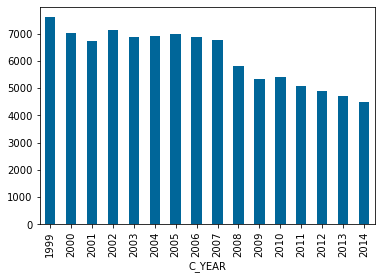

In [89]:
plot_year = df_complete.groupby('C_YEAR')['fatal'].sum()
plot666=plot_year.plot(kind='bar', color='#006699')

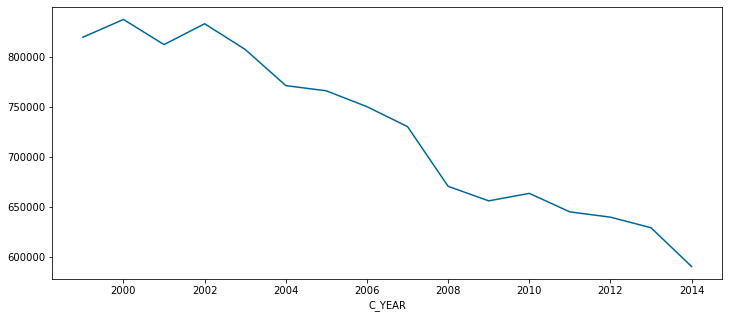

In [90]:
plot_year = df_complete.groupby('C_YEAR')['C_SEV'].sum()
plot1 = plot_year.plot(figsize=(12,5), x='C_YEAR', y='C_SEV', color='#006699')

El numero de accidentes ha ido decreciendo en el tiempo, cada vez hay menos con los nuevos avances en seguridad automovilistica.

#### C_MONTH

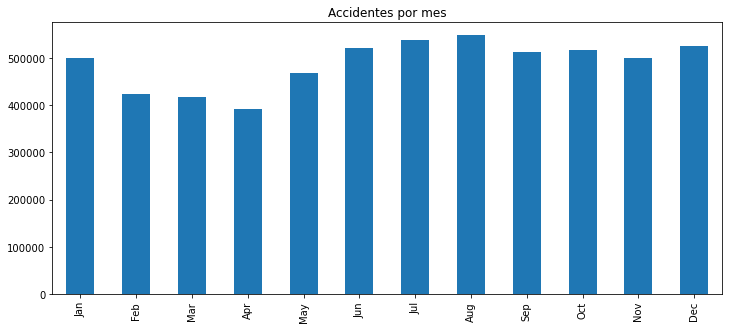

In [91]:
plot_monthly = df_complete.groupby('C_MNTH')['C_SEV'].count()
plot_monthly.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plot2 = plot_monthly.plot(figsize=(12,5), kind='bar',x='index', y='C_SEV', title= 'Accidentes por mes')

La mayor cantidad de accidentes ha producido en los meses de verano, es decir, en los meses de junio julio y agosto. En diciembre tambien vemos un pico que se reduce en los meses siguientes.

#### C_WDAY

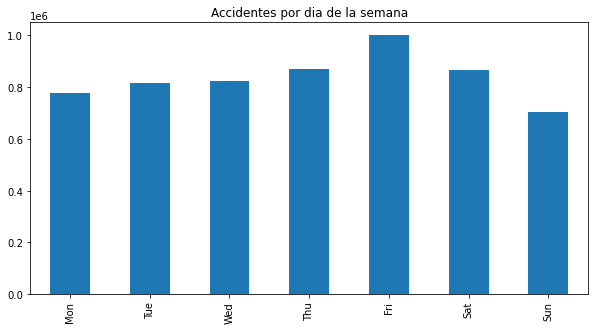

In [92]:
plot_wday = df_complete.groupby('C_WDAY')['C_SEV'].count()
plot_wday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plot3 = plot_wday.plot(figsize=(10,5), kind='bar',x='index', y='C_SEV', title= 'Accidentes por dia de la semana')

Los viernes y sabados son los dias con mayores registros.

#### C_HOUR

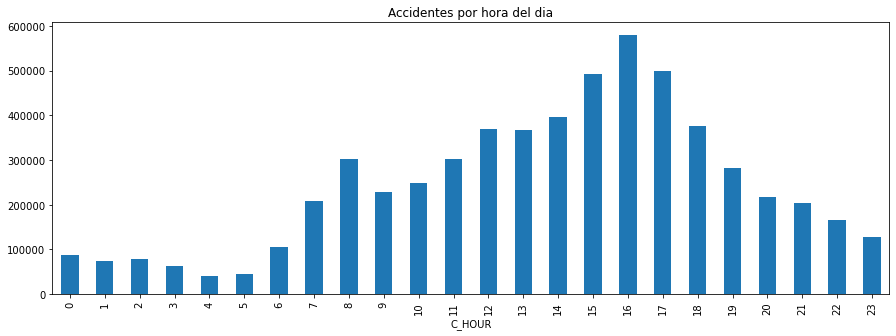

In [93]:
plot_hour = df_complete.groupby('C_HOUR')['C_SEV'].count()
plot4 = plot_hour.plot(figsize=(15,5), kind='bar',x='C_HOUR', y='C_SEV', title= 'Accidentes por hora del dia')

Las horas con mas accidentes corresponden con las horas de sol de Canada, de 07:00 am a 05:00 pm, especialmente en las horas correspondientes a la puesta del sol.

Ahora trataremos las variables categoricas que pensamos serán mas relevantes para el analisis.

### C_VEHS: Numero de vehiculos involucrados en la colision.

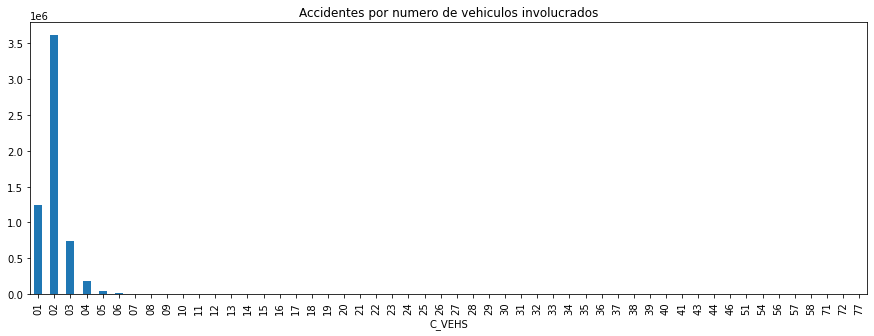

In [94]:
plot_vehs = df_complete.groupby('C_VEHS')['C_SEV'].count()
plot5 = plot_vehs.plot(figsize=(15,5), kind='bar',x='C_VEHS', y='C_SEV', title= 'Accidentes por numero de vehiculos involucrados')

La mayor parte de los accidentes se producen entre 2 coches, despues el segundo escenario que mas se repite son accidentes individuales y a continuacion accidentes entre 3 y 4 coches. 

A partir de 5 coches para arriba, consideramos que no hay accidentes suficientes como para que sean significativos.

### C_CONF: Cómo se dió el accidente.

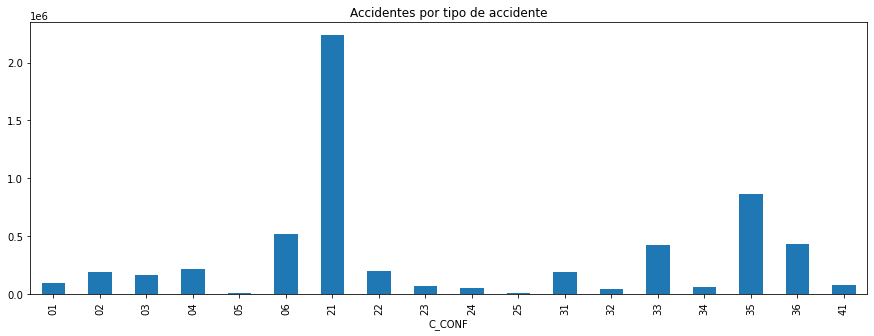

In [95]:
plot_conf = df_complete.groupby('C_CONF')['C_SEV'].count()
plot6 = plot_conf.plot(figsize=(15,5), kind='bar',x='C_CONF', y='C_SEV', title= 'Accidentes por tipo de accidente')

El tipo de accidente mas frecuente es el coche por detrás debido a no respetar la distancia de seguridad, tambien observamos muchos registros de colisiones laterales con angulo de 90 grados.

### C_RCFG: Configuracion de la calzada.

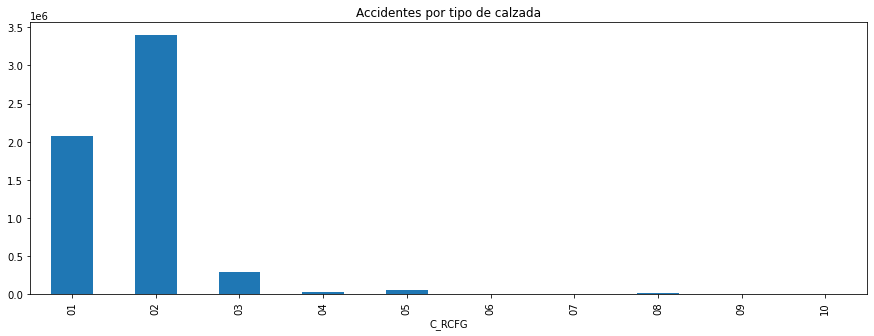

In [96]:
plot_rcfg = df_complete.groupby('C_RCFG')['C_SEV'].count()
plot7 = plot_rcfg.plot(figsize=(15,5), kind='bar',x='C_RCFG', y='C_SEV', title= 'Accidentes por tipo de calzada')

Vemos que las intersecciones es donde mas accidentes se producen, seguido accidentes en mitad de una calle. En esta variable tendremos que tener en cuenta que la anterior transformacion de los valores nan y tener en cuenta que el valor '02' estará algo alterado aunque sigue siendo el tipo con mas registros.

### C_WTHR: Condiciones meteorologicas.

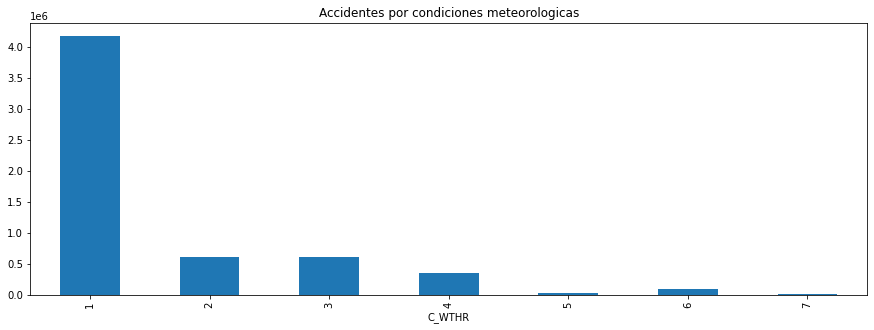

In [97]:
plot_wthr = df_complete.groupby('C_WTHR')['C_SEV'].count()
plot8 = plot_wthr.plot(figsize=(15,5), kind='bar',x='C_WTHR', y='C_SEV', title= 'Accidentes por condiciones meteorologicas')

La mayor parte de los accidentes se dan cuando el cielo esta despejado y está soleado, lo que podriamos denominar accidentes rutinarios. Despues tenemos 3 valores con un numero de accidentes significativos y con un numero de registros parecidos que son accidentes con lluvia, con nubes y mientras nevada respectivamente.

### C_RSUR: Tipo de superficie.

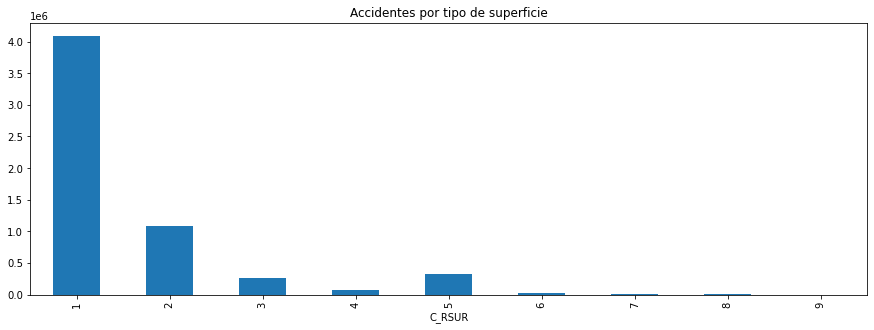

In [98]:
plot_rsur = df_complete.groupby('C_RSUR')['C_SEV'].count()
plot9 = plot_rsur.plot(figsize=(15,5), kind='bar',x='C_RSUR', y='C_SEV', title= 'Accidentes por tipo de superficie')

En este caso volvemos a ver algo parecido a la variable anterior, siendo el calzada seca y normal en la que mas accidentes se producen. Sin embargo el segundo valor con mas registros es con la superficie mojada.

### C_RALN: Alineacion de la calzada

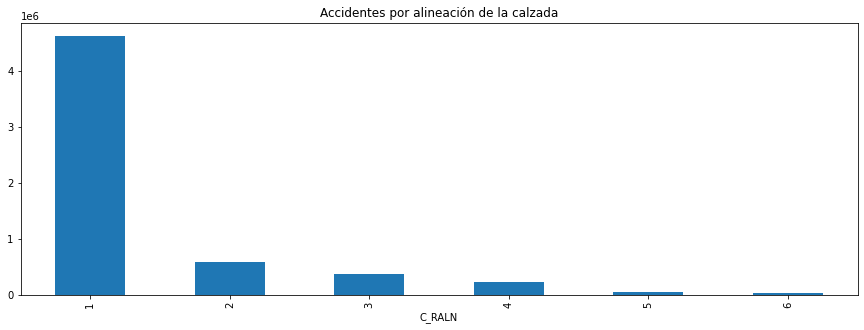

In [99]:
plot_raln = df_complete.groupby('C_RALN')['C_SEV'].count()
plot10 = plot_raln.plot(figsize=(15,5), kind='bar',x='C_RALN', y='C_SEV', title= 'Accidentes por alineación de la calzada')

La mayor parte de accidentes ocurren en rectas sin ningun tipo de inclinacion.

### C_TRAF: Control de trafico.


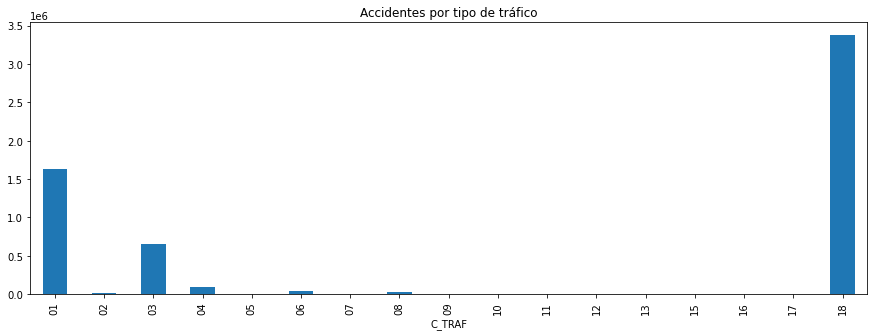

In [100]:
plot_traf = df_complete.groupby('C_TRAF')['C_SEV'].count()
plot11 = plot_traf.plot(figsize=(15,5), kind='bar',x='C_TRAF', y='C_SEV', title= 'Accidentes por tipo de tráfico')

En condiciones donde las señales de trafico estan totalmente operativas es donde se produce mas accidentes, como comentabamos anteriormente, accidentes comunes y rutinarios. Le siguen los accidentes derivados de señales de stop.